### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [8]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [9]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

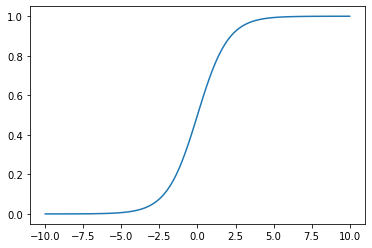

In [13]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [14]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [15]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


## Домашнее задание 

**1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

#### Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

 Логарифмическая функция потерь (log loss) определяется по формуле:$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}(\sigma) + (1 - y_{i})\text{ln} (1-\sigma)).$

In [16]:
# Начальный вид функции
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

# Вариант 1: Заменить нулевые значения, на очень малые ( близкие к нулю) значения добавив коээфициент k.
def calc_logloss_v1(y, y_pred):
    k = 0.00001
    err = - np.mean(y * np.log(y_pred+k) + (1.0 - y) * np.log(1.0 - y_pred+k))
    err = np.sum(err)
    return err

# Вариант 2: Сделать точные исключения 
def calc_logloss_v2(y, y_pred):
    err = np.zeros(y.shape)
    err[y==0] = -(1.0-y[y==0]) * np.log(1.0-y_pred[y==0])
    err[y==1] = -y[y==1] * np.log(y_pred[y==1])
    err = np.sum(err)
    return err

In [17]:
calc_logloss(y1, y_pred1)

0.10536051565782628

In [18]:
calc_logloss_v1(y1, y_pred1)

0.10534940460844315

In [19]:
calc_logloss_v2(y1, y_pred1)

0.21072103131565256

#### Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным

In [20]:
W = eval_model(X_st, y, iterations=5570, alpha=5)

557 [-31.53305624  -3.6407953   -8.25335316  26.68878561] 0.12585944878518368
1114 [-35.87066796  -3.61733388  -9.67560922  29.49026694] 0.10922662226288557
1671 [-39.21255672  -3.91325993 -10.61878089  32.17406952] 0.1022636004022148
2228 [-42.14225373  -4.16850307 -11.44808945  34.51611437] 0.09693387473414247
2785 [-44.77895346  -4.39398119 -12.19761795  36.61390604] 0.09263299543180288
3342 [-47.19747286  -4.5966201  -12.88853278  38.52871309] 0.08902735706593475
3899 [-49.44765775  -4.78109046 -13.53479781  40.30143581] 0.0859169542139433
4456 [-51.56424519  -4.95070417 -14.14604257  41.96067698] 0.08317412935516047
5013 [-53.57229627  -5.10791226 -14.7291293   43.52718708] 0.08071333176716775
5570 [-55.49038676  -5.25459747 -15.28906881  45.01647093] 0.07847496280187223


#### Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [21]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(W, X))
    return y_pred_proba

In [22]:
calc_pred_proba(W,X_st)

array([3.20494733e-01, 8.60092315e-04, 1.00000000e+00, 1.50003939e-11,
       9.78156120e-01, 6.99133053e-03, 1.00000000e+00, 4.93837293e-03,
       6.95302742e-01, 1.00000000e+00])

#### Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [23]:
def calc_pred(W, X):
    y_pred = []
    pred = calc_pred_proba(W, X)
    for i in pred:
        y_pred.append(1 if i > 0.5 else 0)
    return y_pred

In [24]:
calc_pred(W,X_st)

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

#### Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [26]:
y_pred = np.array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype = np.float64)
y, y_pred

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0., 1., 0., 0., 1., 1., 1., 0., 1., 1.]))

In [27]:
#В качестве меры точности возьмем долю правильных ответов
accuracy = 100.0 - np.mean(np.abs(y_pred - y)*100.0)
print(accuracy)

70.0


In [29]:
print(y)
print(y_pred)

[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
[0. 1. 0. 0. 1. 1. 1. 0. 1. 1.]


In [30]:
#матрицa ошибок
def errors_matrix(y,y_pred):
    TP=0
    FP=0
    TN=0
    FN=0
    for i in np.arange(y.shape[0]):
        if y[i]==1 and y_pred[i]==1:
            TP+=1
        elif y[i]==0 and y_pred[i]==0:
            TN+=1
        elif y[i]==0 and y_pred[i]==1:
            FP+=1
        elif y[i]==1 and y_pred[i]==0:
            FN+=1
    
    matrix=np.array([[TP,FP],[FN,TN]])
    return matrix

In [32]:
matrix=errors_matrix(y,y_pred)
print(matrix)

[[4 2]
 [1 3]]


Точность (precision): $precision(a, X) = \frac{TP}{TP+FP}.$

In [33]:
precision=matrix[0,0]/(matrix[0,0]+matrix[0,1])
print(precision)

0.6666666666666666


Полнота (recall): $recall(a, X) = \frac{TP}{TP+FN}$

In [34]:
recall=matrix[0,0]/(matrix[0,0]+matrix[1,0])
print(recall)

0.8


F-мера: $F = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$

In [35]:
F1=2*precision*recall/(precision+recall)
print(F1)

0.7272727272727272


**Могла ли модель переобучиться? Почему?**


При малом объёме данных модели более склонны к переобучению, т.к. каждый экземпляр имеет значительное значение. Чем больше статистическая выборка, тем выше потенциальное качество модели, тем лучшие показатели она даст на тесте.